In [38]:
import pandas as pd
import os
from sklearn import tree 
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import impute
import numpy as np
import sklearn
from sklearn import ensemble
from sklearn import pipeline
from sklearn import compose
import seaborn as sns
from sklearn import feature_selection
from joblib import parallel_backend

In [2]:
dir = r"C:\Users\uma_s\Desktop\Algorithmica\AI\Stroke Prediction\Stroke Prediction Data"
stroke_train = pd.read_csv(os.path.join(dir, "train.csv"))
stroke_train.shape
stroke_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [3]:
stroke_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
#EDA

In [5]:
#Univariate
stroke_train.groupby("stroke").size()
pd.crosstab(index=stroke_train["stroke"], columns="count")

col_0,count
stroke,
0,14672
1,632


In [6]:
pd.crosstab(index=stroke_train["gender"], columns="count")

col_0,count
gender,
Female,9447
Male,5857


In [7]:
pd.crosstab(index=stroke_train["hypertension"], columns="count")

col_0,count
hypertension,
0,14543
1,761


In [8]:
pd.crosstab(index=stroke_train["heart_disease"], columns="count")

col_0,count
heart_disease,
0,14947
1,357


In [9]:
pd.crosstab(index=stroke_train["ever_married"], columns="count")

col_0,count
ever_married,
No,4919
Yes,10385


In [10]:
pd.crosstab(index=stroke_train["work_type"], columns="count")

col_0,count
work_type,
Govt_job,1533
Never_worked,42
Private,9752
Self-employed,1939
children,2038


In [11]:
pd.crosstab(index=stroke_train["Residence_type"], columns="count")

col_0,count
Residence_type,
Rural,7664
Urban,7640


In [12]:
pd.crosstab(index=stroke_train["smoking_status"], columns="count")

col_0,count
smoking_status,
Unknown,4543
formerly smoked,2337
never smoked,6281
smokes,2143


<Axes: xlabel='avg_glucose_level'>

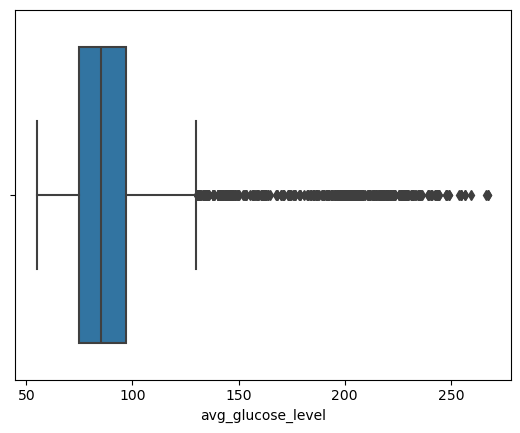

In [13]:
sns.boxplot(x='avg_glucose_level',data=stroke_train)

In [14]:
stroke_train['age'].describe()

count    15304.000000
mean        41.417708
std         21.444673
min          0.080000
25%         26.000000
50%         43.000000
75%         57.000000
max         82.000000
Name: age, dtype: float64

<Axes: xlabel='bmi'>

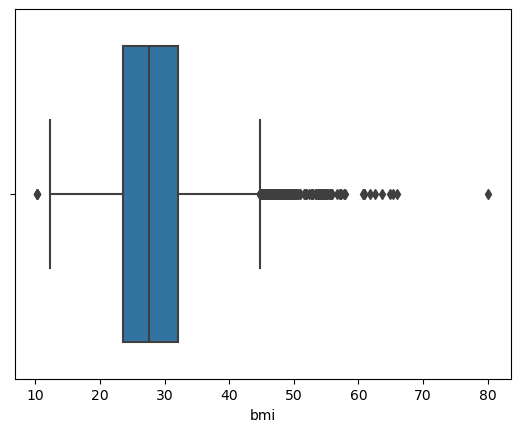

In [15]:
sns.boxplot(x='bmi',data=stroke_train)

In [16]:
#Bivariate

AttributeError: 'numpy.int64' object has no attribute 'startswith'

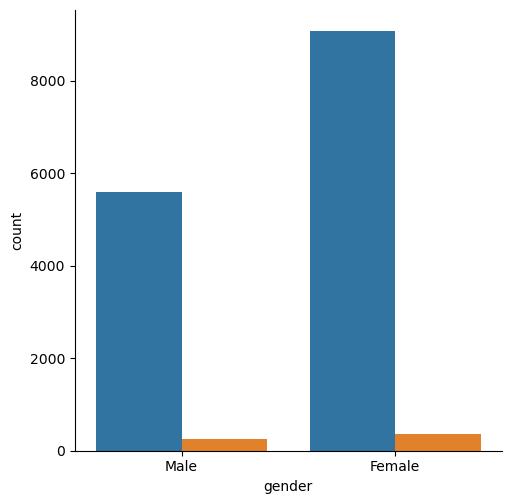

In [17]:
sns.catplot(x="gender", hue="stroke", data=stroke_train, kind="count")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

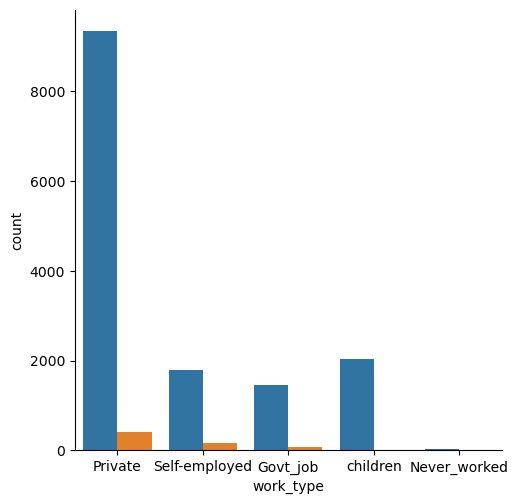

In [18]:
sns.catplot(x="work_type", hue="stroke", data=stroke_train, kind="count")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

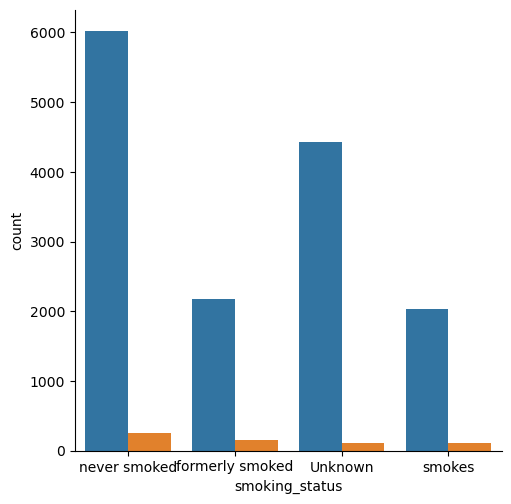

In [19]:
sns.catplot(x="smoking_status", hue="stroke", data=stroke_train, kind="count")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

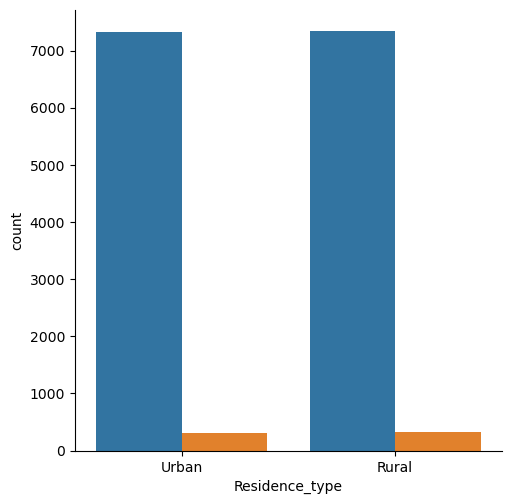

In [20]:
sns.catplot(x="Residence_type", hue="stroke", data=stroke_train, kind="count")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

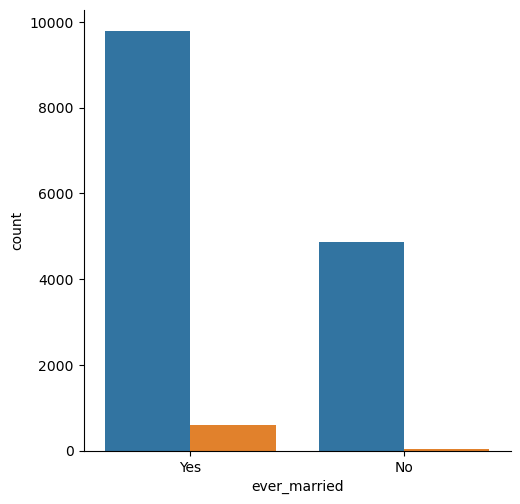

In [21]:
sns.catplot(x="ever_married", hue="stroke", data=stroke_train, kind="count")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

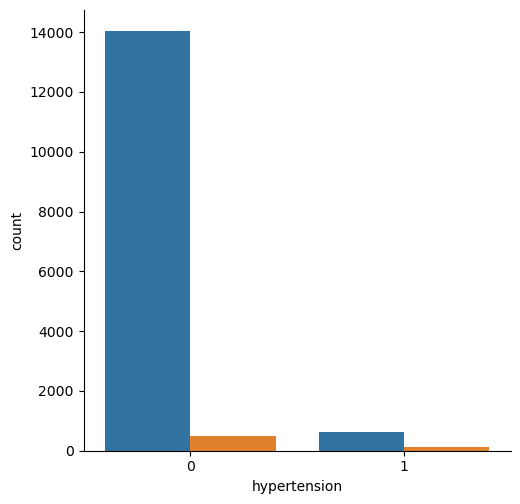

In [22]:
sns.catplot(x="hypertension", hue="stroke", data=stroke_train, kind="count")

AttributeError: 'numpy.int64' object has no attribute 'startswith'

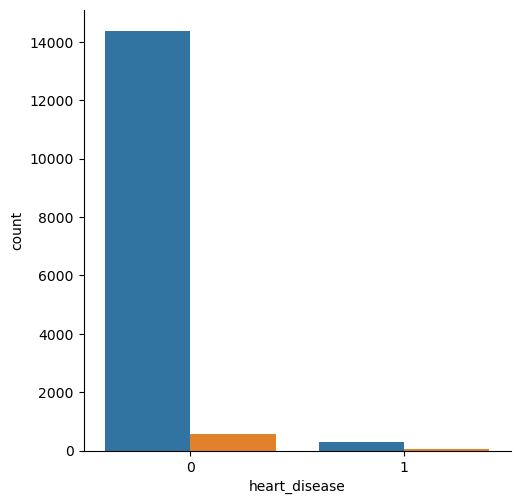

In [23]:
sns.catplot(x="heart_disease", hue="stroke", data=stroke_train, kind="count")

C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


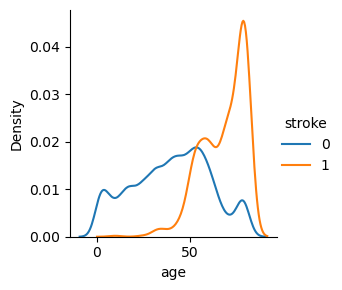

In [24]:
sns.FacetGrid(stroke_train, hue="stroke").map(sns.kdeplot, "age").add_legend()

C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


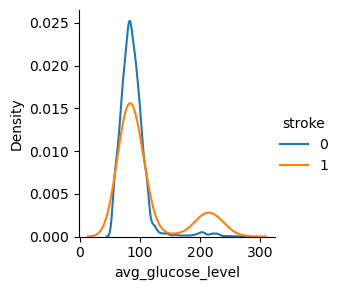

In [25]:
sns.FacetGrid(stroke_train, hue="stroke").map(sns.kdeplot, "avg_glucose_level").add_legend()

C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\uma_s\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


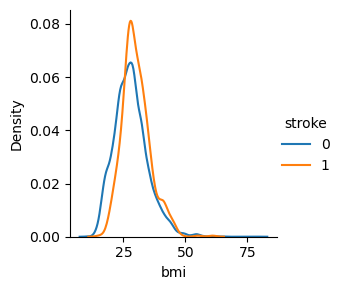

In [26]:
sns.FacetGrid(stroke_train, hue="stroke").map(sns.kdeplot, "bmi").add_legend()

In [27]:
#Preprocessing
cont_features = ['age','avg_glucose_level', 'bmi']
steps = [('scaler', preprocessing.StandardScaler())]
cont_pipe = pipeline.Pipeline(steps)

cat_features = ['gender','work_type', 'Residence_type', 'ever_married']
steps = [('ohe', preprocessing.OneHotEncoder(dtype=np.int64))]
cat_pipe = pipeline.Pipeline(steps)

ord_features = ['smoking_status']
order = ['never smoked', 'Unknown', 'formerly smoked', 'smokes']
steps = [('oe', preprocessing.OrdinalEncoder(categories = [order]))]
ord_pipe = pipeline.Pipeline(steps)

pass_features = ['hypertension', 'heart_disease']

preprocessing_pipe = compose.ColumnTransformer([("continuous", cont_pipe, cont_features), ("categorical", cat_pipe, cat_features), ("ordinal", ord_pipe, ord_features), ("pass", "passthrough", pass_features) ])

In [28]:
#Feature Engineering
features_pipe = pipeline.FeatureUnion([('stats_selector', feature_selection.SelectKBest() ),('rf_selector', feature_selection.SelectFromModel(ensemble.RandomForestClassifier()) )])

In [29]:
#Full Pipeline with model, feature engineering, and preprocessing pipelines
pipe = pipeline.Pipeline(steps=[("preprocessing", preprocessing_pipe),('zv_filter', feature_selection.VarianceThreshold()), ('features', features_pipe),("rf", ensemble.RandomForestClassifier())])
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int64'>))]),
                                                  ['gender', 'work_type',
                                                   'Residence_type',
                                                   'ever_married']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(cat...ver '
                                                                                               'smoked',
                                                                                               'Unknown',
                                                                                               'formerly '
                                                                                               'smoked',
                                                                                               'smokes']]))]),
                                                  ['smoking_status']),
                                                 ('pass', 'passthrough',
                                                  ['hypertension',
                                                   'heart_disease'])])),
                ('zv_filter', VarianceThreshold()),
                ('features',
                 FeatureUnion(transformer_list=[('stats_selector',
                                                 SelectKBest()),
                                                ('rf_selector',
                                                 SelectFromModel(estimator=RandomForestClassifier()))])),
                ('rf', RandomForestClassifier())])

In [40]:
#Pipe Grid, GridSearchCV, and model tuning/model evaluation
X_train = stroke_train
y_train = stroke_train['stroke']
pipe_grid = {'features__stats_selector__k': [5,6,7,8], 'features__rf_selector__threshold': [0.02,0.03, 0.04, 0.05], 'rf__max_depth': [3,4,5,6], 'rf__n_estimators':list(range(10, 200, 50))}
cv = model_selection.KFold(10, shuffle=True)
clf = model_selection.GridSearchCV(pipe, pipe_grid, cv=cv, scoring='accuracy', n_jobs=8, return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_index_)
print(clf.best_estimator_)

{'features__rf_selector__threshold': 0.03, 'features__stats_selector__k': 6, 'rf__max_depth': 4, 'rf__n_estimators': 160}
0.9592251209214362
87
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(dtype=<class 'numpy.int64'>))]),
                                                  ['gender', 'work_type',
                                                   'Residence_type',
                                                   'ever_m

In [31]:
print(clf.best_estimator_[0].get_feature_names_out())
print(clf.best_estimator_[1].get_feature_names_out())
print(clf.best_estimator_[2].get_feature_names_out())

['continuous__age' 'continuous__avg_glucose_level' 'continuous__bmi'
 'categorical__gender_Female' 'categorical__gender_Male'
 'categorical__work_type_Govt_job' 'categorical__work_type_Never_worked'
 'categorical__work_type_Private' 'categorical__work_type_Self-employed'
 'categorical__work_type_children' 'categorical__Residence_type_Rural'
 'categorical__Residence_type_Urban' 'categorical__ever_married_No'
 'categorical__ever_married_Yes' 'ordinal__smoking_status'
 'pass__hypertension' 'pass__heart_disease']
['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16']
['stats_selector__x0' 'stats_selector__x1' 'stats_selector__x12'
 'stats_selector__x13' 'stats_selector__x15' 'stats_selector__x16'
 'rf_selector__x0' 'rf_selector__x1' 'rf_selector__x2' 'rf_selector__x14'
 'rf_selector__x15']


In [35]:
stroke_test = pd.read_csv(os.path.join(dir, "test.csv"))
print(stroke_test.shape)
stroke_test.head()

(10204, 11)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [36]:
X_test = stroke_test
stroke_test['stroke'] = clf.predict(X_test)
stroke_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown,0
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown,0
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown,0
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes,0
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes,0


In [37]:
stroke_test.to_csv(os.path.join(dir, "submission1.csv"), columns=["id", "stroke"], index=False)